In [37]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [19]:
df = pd.read_csv("country_level_data.csv", sep=",")
mean_GDP = df['gdp'].mean()
median_GDP = df['gdp'].median()
std_dev_GDP = df['gdp'].std()
mean_plastic = df['composition_plastic_percent'].mean()
median_plastic = df['composition_plastic_percent'].median()
std_dev_plastic = df['composition_plastic_percent'].std()


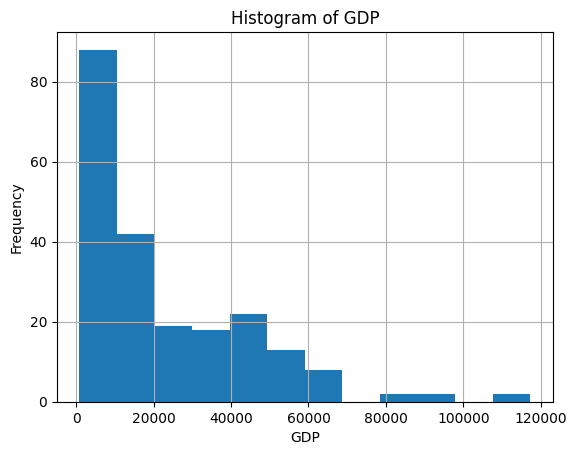

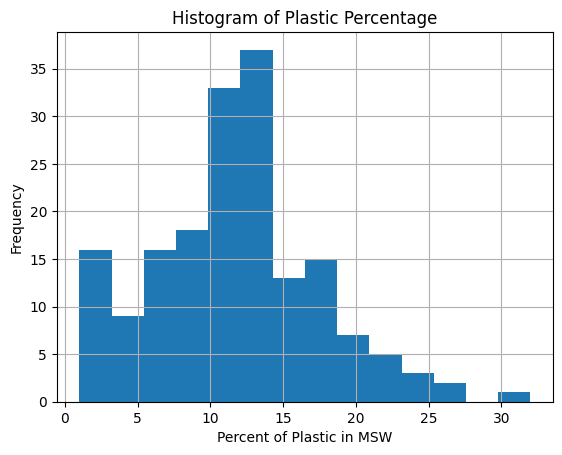

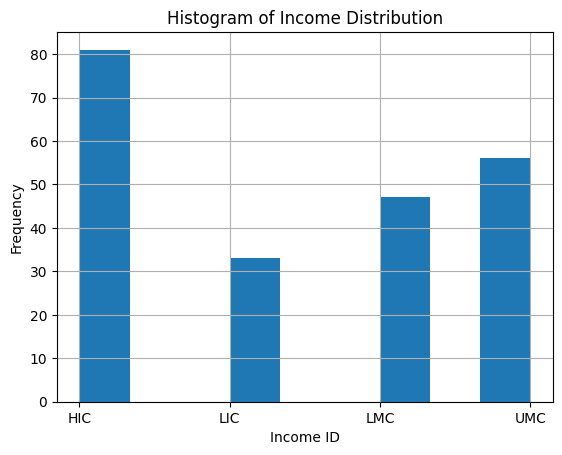

In [20]:
df['gdp'].hist(bins="auto")
plt.title('Histogram of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show() 

df['composition_plastic_percent'].hist(bins="auto")
plt.title('Histogram of Plastic Percentage')
plt.xlabel('Percent of Plastic in MSW')
plt.ylabel('Frequency')
plt.show()

df['income_id'].hist(bins="auto")
plt.title('Histogram of Income Distribution')
plt.xlabel('Income ID')
plt.ylabel('Frequency')
plt.show()


In [21]:
data = df[['composition_plastic_percent', 'gdp']].dropna()
x = data['gdp'].values
y = data['composition_plastic_percent'].values
PearsonTest = stats.pearsonr(x, y)
print("Pearson Correlation:")
print(PearsonTest)
print(type(PearsonTest))
print("r =", PearsonTest.statistic)
print("p =", PearsonTest.pvalue)

SPTest = stats.spearmanr(x, y)
print("\nSpearman Correlation:")
print(SPTest)
print(type(SPTest))
print("r =", SPTest.statistic)
print("p =", SPTest.pvalue)

LR = stats.linregress(x, y)
print("\nLinear Regression")
print(LR)
print("y =", str(np.round(LR.slope, 4)) + "x + " + str(np.round(LR.intercept, 4)))




Pearson Correlation:
PearsonRResult(statistic=0.06069894890165234, pvalue=0.4262430338587761)
<class 'scipy.stats._stats_py.PearsonRResult'>
r = 0.06069894890165234
p = 0.4262430338587761

Spearman Correlation:
SignificanceResult(statistic=0.12797187299627885, pvalue=0.09240914691033936)
<class 'scipy.stats._stats_py.SignificanceResult'>
r = 0.12797187299627885
p = 0.09240914691033936

Linear Regression
LinregressResult(slope=1.4625968517249713e-05, intercept=11.333477146084183, rvalue=0.06069894890165241, pvalue=0.42624303385877527, stderr=1.833908711715965e-05, intercept_stderr=0.634948572261652)
y = 0.0x + 11.3335


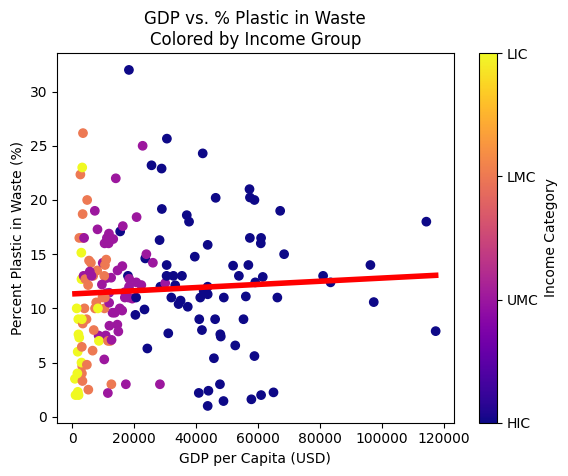

In [29]:
new_df = df[['gdp', 'composition_plastic_percent', 'income_id']].dropna()

fig, ax = plt.subplots()

ax.set_xlabel("GDP per Capita (USD)")
ax.set_ylabel("Percent Plastic in Waste (%)")

order = ["HIC", "UMC", "LMC", "LIC"]
income_cats = new_df["income_id"].astype("category")
income_cats = income_cats.cat.set_categories(order, ordered=True)

income_codes = income_cats.cat.codes

sc = ax.scatter(new_df['gdp'], new_df['composition_plastic_percent'],
    c=income_codes,cmap='plasma')

linR = scipy.stats.linregress(new_df['gdp'], new_df['composition_plastic_percent'])

x_vals = np.linspace(new_df['gdp'].min(), new_df['gdp'].max(), 200)
y_vals = linR.slope * x_vals + linR.intercept

ax.plot(x_vals, y_vals, c="red", lw=4)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Income Category")

cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(order)

plt.title("GDP vs. % Plastic in Waste\nColored by Income Group")
plt.show()

(105, 7)
PCA Variance Ratios: [0.37161171 0.25732086 0.14548036 0.10179905 0.08139142 0.04018028]
PCA Components (weights):
[[-0.13425358  0.60100714  0.58685312 -0.10611164  0.2126128  -0.15222097
   0.44354786]
 [-0.59206366 -0.00930503 -0.14598605 -0.10048499  0.51561147 -0.44171218
  -0.39623231]
 [ 0.00175503  0.01961455  0.03554844  0.92203366 -0.08110847 -0.37170502
   0.05881512]
 [-0.40513422  0.06099611 -0.04351877  0.34110977  0.30636332  0.78538841
   0.05659107]
 [-0.53587837  0.23957877  0.10910996 -0.04077454 -0.75506639  0.04231423
  -0.26448649]
 [ 0.37982512  0.24179054  0.41926187  0.10157233  0.13509304  0.15787474
  -0.75365655]]


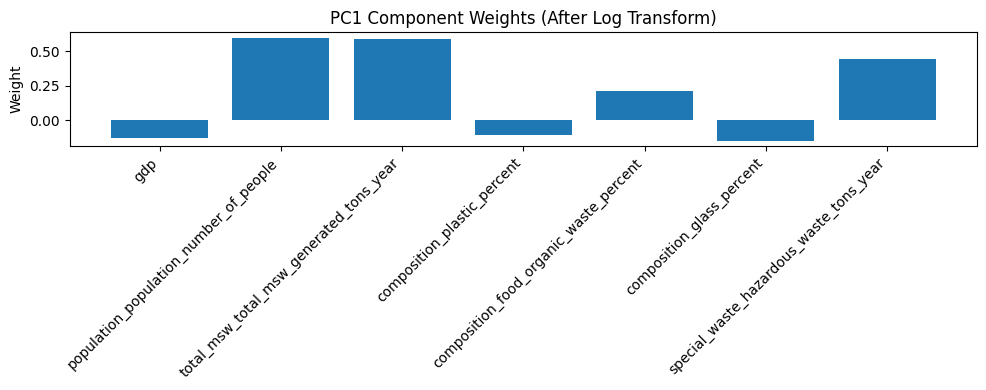

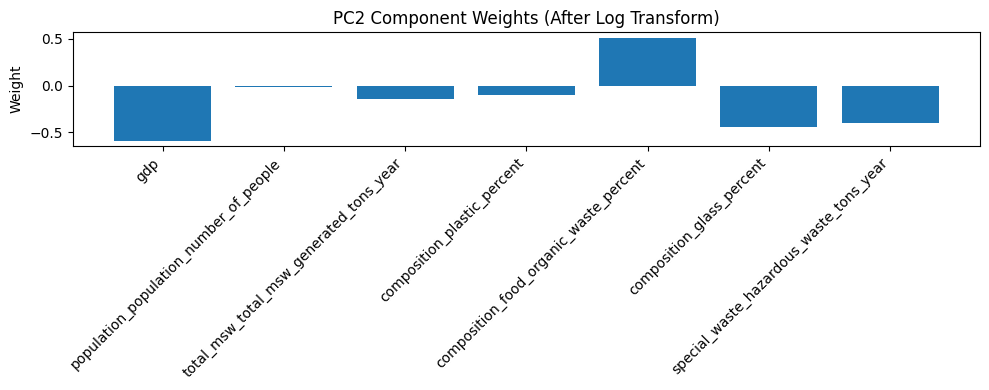

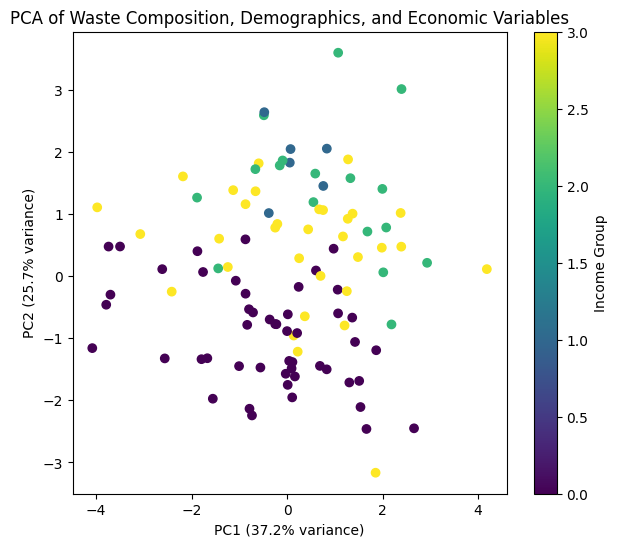

In [54]:
quant_df = df[["gdp", "population_population_number_of_people",
            "total_msw_total_msw_generated_tons_year","composition_plastic_percent", 
            "composition_food_organic_waste_percent", "composition_glass_percent",
            "special_waste_hazardous_waste_tons_year"]].dropna()

quant_df_log = quant_df.copy()

cols_to_log = ["gdp", "population_population_number_of_people", "total_msw_total_msw_generated_tons_year", 
            "special_waste_hazardous_waste_tons_year"]

for col in cols_to_log:
    quant_df_log[col] = np.log1p(quant_df_log[col])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(quant_df_log)

pca = PCA(n_components=0.99)
PCs = pca.fit_transform(scaled_data)

print("PCA Variance Ratios:", pca.explained_variance_ratio_)
print("PCA Components (weights):")
print(pca.components_)


feature_names = quant_df_log.columns

pc1 = pca.components_[0]
x = np.arange(len(feature_names))
plt.figure(figsize=(10,4))
plt.bar(x, pc1)
plt.xticks(x, feature_names, rotation=45, ha='right')
plt.title("PC1 Component Weights (After Log Transform)")
plt.ylabel("Weight")
plt.tight_layout()
plt.show()

pc2 = pca.components_[1]
x = np.arange(len(feature_names))
plt.figure(figsize=(10,4))
plt.bar(x, pc2)
plt.xticks(x, feature_names, rotation=45, ha='right')
plt.title("PC2 Component Weights (After Log Transform)")
plt.ylabel("Weight")
plt.tight_layout()
plt.show()
income_cats = df.loc[quant_df_log.index, "income_id"].astype("category")
income_codes = income_cats.cat.codes

plt.figure(figsize=(7,6))
plt.scatter(PCs[:,0], PCs[:,1], c=income_codes, cmap="viridis")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.title("PCA of Waste Composition, Demographics, and Economic Variables")
plt.colorbar(label="Income Group")

plt.show()